In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import vincenty

In [2]:
# load train and test data
df_mess_train = pd.read_csv('mess_train_list.csv') # train set
df_mess_test = pd.read_csv('mess_test_list.csv') # test set
pos_train = pd.read_csv('pos_train_list.csv') # position associated to train set

In [3]:
df_mess_train.describe()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
count,39250.000000,3.925000e+04,39250.000000,39250.000000,3.925000e+04,39250.000000,39250.000000
mean,4533.774752,4.835932e+05,1.043541,-125.863580,1.473368e+12,42.554998,-100.969685
std,2570.495638,9.893140e+04,0.563540,9.226500,5.506910e+09,7.722787,11.522732
min,879.000000,4.732880e+05,0.000000,-155.000000,1.463546e+12,36.053394,-107.463146
25%,2790.000000,4.761230e+05,1.000000,-132.500000,1.468410e+12,39.747448,-105.074287
50%,3559.000000,4.763150e+05,1.000000,-127.333333,1.473444e+12,39.793585,-105.043685
75%,7456.000000,4.766090e+05,1.500000,-121.000000,1.479118e+12,39.838740,-104.998429
max,11951.000000,1.747448e+06,2.000000,-64.000000,1.481143e+12,64.300000,-68.500000


In [7]:
df_mess_train.nunique()

messid     6068
bsid        251
did         113
nseq          5
rssi        276
time_ux    6067
bs_lat      221
bs_lng      221
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
ohe = OneHotEncoder(categories='auto')

In [14]:
ohe.fit(df_mess_train[["bsid"]])

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [21]:
ohe.transform(df_mess_train[["bsid"]])

<39250x251 sparse matrix of type '<class 'numpy.float64'>'
	with 39250 stored elements in Compressed Sparse Row format>

In [28]:
feat = pd.DataFrame(data=ohe.transform(df_mess_train[["bsid"]]).toarray(), index = df_mess_train.messid)

In [5]:
df_mess_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


In [4]:
pd.get_dummies(df_mess_train).head()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,messid_573bf1d9864fce1a9af8c5c9,messid_573bf3533e952e19126b256a,messid_573c0cd0f0fe6e735a699b93,...,messid_584810c8e541cd0e13edce7d,messid_5848214a12f14360d75d16ec,messid_584823b9e541cd0e13fe0548,messid_58483ded12f14360d774f58d,messid_58484e19e541cd0e132097db,messid_5848551912f14360d786ede6,messid_58485a25e541cd0e1329b8d6,messid_58485bd412f14360d78bebdb,messid_5848672e12f14360d7942374,messid_58487473e541cd0e133cca72
0,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
feat.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
messid,,,,,,,,,,,,,,,,,,,,,
573bf1d9864fce1a9af8c5c9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573bf1d9864fce1a9af8c5c9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573bf3533e952e19126b256a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573c0cd0f0fe6e735a699b93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573c0cd0f0fe6e735a699b93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fea

In [43]:
len(df_mess_train.bsid.unique())

251

In [5]:
df_mess_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


In [28]:
df_mess_test.groupby('messid').mean()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
messid,,,,,,,
573be2503e952e191262c351,3578.000000,116539.0,2.000000,-111.000000,1.463542e+12,39.728651,-105.163032
573c05f83e952e1912758013,5802.375000,472504.0,0.000000,-126.125000,1.463551e+12,39.763474,-105.094321
573c0796f0fe6e735a66deb3,2759.000000,472397.0,1.500000,-128.250000,1.463552e+12,39.666322,-105.028319
573c08d2864fce1a9a0563bc,7456.000000,472504.0,1.000000,-113.000000,1.463552e+12,39.782113,-105.072701
573c08ff864fce1a9a0579b0,2759.000000,472397.0,0.750000,-129.208333,1.463552e+12,39.666322,-105.028319
573c0a45f0fe6e735a684459,5757.000000,472504.0,1.000000,-106.000000,1.463553e+12,39.782662,-105.080724
573c0bb7f0fe6e735a6904a7,3736.857143,472504.0,1.642857,-119.000000,1.463553e+12,39.745804,-105.058712
573c161d3e952e19127e5da0,7869.000000,116527.0,0.500000,-126.166667,1.463556e+12,39.750277,-104.988522
573c201bf0fe6e735a759e7b,4135.000000,472851.0,1.125000,-128.375000,1.463558e+12,39.723056,-104.971565


In [6]:
df_mess_train.describe()

,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
count,39250.000000,3.925000e+04,39250.000000,39250.000000,3.925000e+04,39250.000000,39250.000000
mean,4533.774752,4.835932e+05,1.043541,-125.863580,1.473368e+12,42.554998,-100.969685
std,2570.495638,9.893140e+04,0.563540,9.226500,5.506910e+09,7.722787,11.522732
min,879.000000,4.732880e+05,0.000000,-155.000000,1.463546e+12,36.053394,-107.463146
25%,2790.000000,4.761230e+05,1.000000,-132.500000,1.468410e+12,39.747448,-105.074287
50%,3559.000000,4.763150e+05,1.000000,-127.333333,1.473444e+12,39.793585,-105.043685
75%,7456.000000,4.766090e+05,1.500000,-121.000000,1.479118e+12,39.838740,-104.998429
max,11951.000000,1.747448e+06,2.000000,-64.000000,1.481143e+12,64.300000,-68.500000


In [5]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [7]:
pos_train.describe()

,lat,lng
count,39250.000000,39250.000000
mean,39.783333,-105.056343
std,0.206262,0.162954
min,35.770683,-107.630679
25%,39.708599,-105.060463
50%,39.776882,-105.039440
75%,39.805279,-105.018730
max,43.140387,-102.094289


In [8]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [9]:
len(listOfBs)

259

In [8]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
le.fit(listOfBs)

LabelEncoder()

In [14]:
le.transform(df_mess_train.bsid)

array([ 79, 108,  54, ..., 222,  92, 196])

In [21]:
# Feature Matrix construction 

def feat_mat_const(df_mess_train, listOfBs):
    df_feat = df_mess_train[["bsid","did","nseq","rssi","time_ux"]]
    df_feat["bsid"] = le.transform(df_mess_train.messid)
    return df_feat

In [22]:
feat_mat_const(df_mess_train, listOfBs)

ValueError: y contains previously unseen labels: '573bf1d9864fce1a9af8c5c9'

In [13]:
# ground truth construction

def ground_truth_const(df_mess_train, pos_train):


    
    return ground_truth_lat, ground_truth_lng

In [ ]:
df_feat = feat_mat_const(df_mess_train, listOfBs)
df_feat.head()

In [ ]:
ground_truth_lat, ground_truth_lng = ground_truth_const(df_mess_train, pos_train)
ground_truth_lat.shape

In [132]:
# Validation

In [133]:
def regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_test):
    
    # train regressor and make prediction in the train set
    # Input: df_feat: feature matrix used to train regressor
    #        ground_truth_lat: df_feat associated latitude
    #        ground_truth_lng: df_feat associated longitude
    #        df_test: data frame used for prediction
    # Output: y_pred_lat, y_pred_lng

    
    return y_pred_lat, y_pred_lng


In [134]:
# Make regressor and prediction using the train set

In [146]:
y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat)

In [136]:
# Cross validation

In [139]:
# Evaluate result

In [140]:
def vincenty_vec(vec_coord):
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] !=  4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [vincenty(vec_coord[m,0:2],vec_coord[m,2:]).meters for m in range(vec_coord.shape[0])]
    return vin_vec_dist

In [141]:
# evaluate distance error for each predicted point
def Eval_geoloc(y_train_lat , y_train_lng, y_pred_lat, y_pred_lng):
    vec_coord = np.array([y_train_lat , y_train_lng, y_pred_lat, y_pred_lng])
    err_vec = vincenty_vec(np.transpose(vec_coord))
    
    return err_vec

In [147]:
err_vec = Eval_geoloc(ground_truth_lat , ground_truth_lng, y_pred_lat, y_pred_lng)

In [148]:
# Plot error distribution

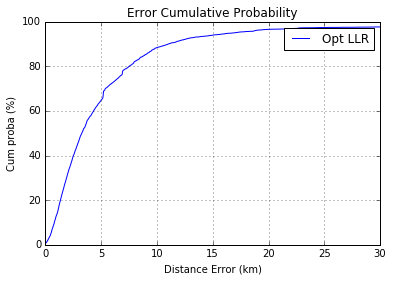

In [149]:
values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1]/1000, cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

In [150]:
# Error criterion

np.percentile(err_vec, 80)

7522.0667120795024

In [151]:
# Construct test prediction